# Visualización de capaz en una red neuronal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from mpl_toolkits import mplot3d

### Red neuronal FeedForward

* Una capa oculta $\tanh(wx+b)$
* Una capa de salida con activación Softmax

In [2]:
class neural_network():
    def __init__(self, n_inputs, n_outputs, hidden_units=3):
        super().__init__()
        np.random.seed(0)
        self.w1 = np.random.randn(hidden_units,n_inputs)/np.sqrt(n_inputs)
        self.b1 = np.zeros(hidden_units)
        self.w2 = np.random.randn(n_outputs,hidden_units)/np.sqrt(hidden_units)
        self.b2 = np.zeros(n_outputs)
        
    def hidden(self, x):
        return np.tanh(self.w1@x+self.b1)
    
    def output(self,h):
        tmp = np.exp(self.w2@h+self.b2)
        return tmp/tmp.sum()
    
    def forward(self,X):
        h = np.tanh(X@self.w1.T+self.b1)
        tmp = np.exp(h@self.w2.T+self.b2)
        f = tmp/tmp.sum(1, keepdims=True)
        
        return np.argmax(f, axis=1)
        
        
    def train(self,X,Y,its=1000,lr=1,e=1e-8,reg=0.001):
        data_noise = np.array([np.random.normal(0,1,2) for i in range(n)])
        data = list(zip(X+0.1*data_noise,Y))
        mu1 = 0
        mub1 = 0
        mu2 = 0
        mub2 = 0
        t = 0
        stop = False
        risk = []
        while stop == False:
            error = 0
            risk_epoch = 0
            #Aleatoriza los ejemplos
            np.random.shuffle(data)
            for x,y in data:
                #FORWARD
                h = self.hidden(x) 
                f = self.output(h)
                risk_epoch -= np.log(f)[int(y)]+reg*(np.linalg.norm(self.w1)+np.linalg.norm(self.w2)+np.linalg.norm(self.b1)+np.linalg.norm(self.b2))

                #BACKWARD
                d_out = f.copy()
                d_out[int(y)] -= 1
                d_h = (1-h**2)*np.dot(self.w2.T,d_out)    
                Dw2 = np.outer(d_out,h)
                Db2 = d_out
                Dw1 = np.outer(d_h,x)
                Db1 = d_h
                Dw2 += reg*self.w2
                Dw1 += reg*self.w1
                Db2 += reg*self.b2
                Db1 += reg*self.b1
                mu1 += Dw1**2
                mub1 += Db1**2
                mu2 += Dw2**2
                mub2 += Db2**2

                #Cada matriz de pesos se actualiza por Adagrad
                self.w2 -= (lr/(np.sqrt(mu2)+e))*Dw2
                self.b2 -= (lr/(np.sqrt(mub2)+e))*Db2
                self.w1 -= (lr/(np.sqrt(mu1)+e))*Dw1
                self.b1 -= (lr/(np.sqrt(mub1)+e))*Db1

                #Error cuadrático
                error += (np.argmax(f)-y)**2

            t += 1
            if t%10 == 0:
                print('Error en iteración {}: {}; Riesgo: {}'.format(t,error,risk_epoch))
            #Condición de paro
            if t == its: #or error == 0:
                print('Error en iteración {}: {}'.format(t,error))
                stop = True
            
            risk.append(risk_epoch)
        plt.plot(risk)
        plt.show()

### Generación de datos de entrenamiento

Generación de 3 clases no convexos.

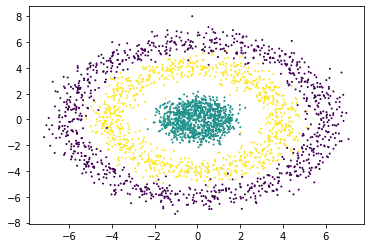

In [7]:
r0 = 1
r1 = 4
r2 = 6

k = 1000

X1 = [np.array([r0*np.cos(t),r0*np.sin(t)]) for t in range(0,k)]
X2 = [np.array([r1*np.cos(t),r1*np.sin(t)]) for t in range(0,k)]
X3 = [np.array([r2*np.cos(t),r2*np.sin(t)]) for t in range(0,k)]

X = np.concatenate((X1,X2,X3))
#X = np.concatenate((X1,X3))
n,d = X.shape
Y = np.zeros(3*k)
Y[:k] += 1
Y[k:2*k] += 2

noise = np.array([np.random.normal(0,1,2) for i in range(n)])
X += 0.5*noise 

plt.scatter(X[:,0], X[:,1],c=Y,s=1)
plt.show()

### Entrenamiento de la red neuronal

In [8]:
model = neural_network(n_inputs=2,n_outputs=3,hidden_units=3)

Error en iteración 10: 2606.0; Riesgo: 1411.185371744334
Error en iteración 20: 1642.0; Riesgo: 1291.687009096511
Error en iteración 30: 462.0; Riesgo: 1216.737919632588
Error en iteración 40: 560.0; Riesgo: 1161.1494005183372
Error en iteración 50: 540.0; Riesgo: 1116.580652780918
Error en iteración 60: 482.0; Riesgo: 1079.812682096615
Error en iteración 70: 556.0; Riesgo: 1049.9802506070612
Error en iteración 80: 522.0; Riesgo: 1024.1507890128255
Error en iteración 90: 513.0; Riesgo: 1002.7852932156509
Error en iteración 100: 569.0; Riesgo: 983.6551521031536
Error en iteración 100: 569.0


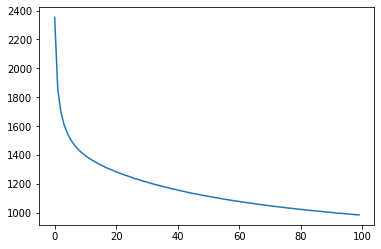

In [9]:
model.train(X,Y,lr=0.1,reg=0.001,its=100)

#### Clasificación de los datos

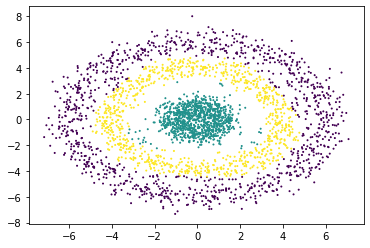

In [10]:
plt.scatter(X[:,0], X[:,1],s=1,c=model.forward(X))
plt.show()

In [11]:
((model.forward(X)-Y)**2).sum()/n

0.14033333333333334

## Visualización de la red

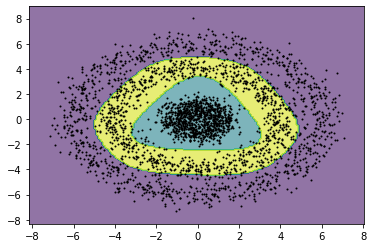

In [12]:
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
yhat = model.forward(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, alpha=0.6)

plt.scatter(X[:,0],X[:,1],c='black',s=1)
plt.show()

#### Encaje del plano original en 3d

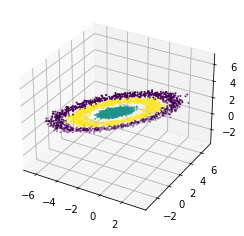

In [13]:
GX = X@model.w1.T+model.b1

ax = plt.axes(projection='3d')
ax.scatter(GX[:,0], GX[:,1], GX[:,2], c=Y, s=1)
plt.show()

#### Transformación a espacio 3-dimensional

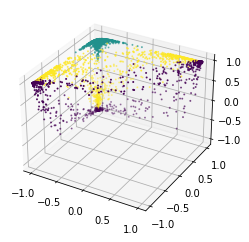

In [14]:
TX = np.array([model.hidden(x) for x in X]) #np.array([model.hidden(x) for x in X])

#plt.scatter(TX[:,0],TX[:,1], c=Y)
ax = plt.axes(projection='3d')
ax.scatter(TX[:,0], TX[:,1], TX[:,2], c=Y, s=1)
plt.show()

Visulización de la transformación:

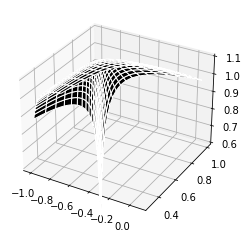

In [15]:
n =100

theta = np.linspace(-2, 2, n)
phi = np.linspace(-2, 2, n)
rho = np.linspace(-2, 2, n)
theta, phi = np.meshgrid(theta, phi)


x = np.tanh(model.w1[0,:][0]*theta + model.w1[0,:][1]*phi+model.b1[0])
y = np.tanh(model.w1[1,:][0]*theta + model.w1[1,:][1]*phi+model.b1[1])
z = np.tanh(model.w1[2,:][0]*theta + model.w1[2,:][1]*phi+model.b1[2])

ax1 = plt.axes(projection='3d')
ax1.set_zlim(0.6,1.1)
ax1.plot_surface(x,y,z, rstride=5, cstride=5, color='k', edgecolors='w')
plt.show()